In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Let's generate therotical signal 

t1 = 0 # start time
t2 = 100 # end time
dt = 0.1 # time step
time_vect = np.arange(t1,t2,dt) # Define time vector
#time_vect

#model signal
signal = np.sin(time_vect/2)

#Add noise to the signal
noise_level = 1 # Noise
bckround_max = 3 # Background level

#Create a noisy signal with background
noisy_signal = signal + (-(time_vect**2) + t2*time_vect) / (t2**2/4)*bckround_max + noise_level*np.random.randn(len(time_vect))



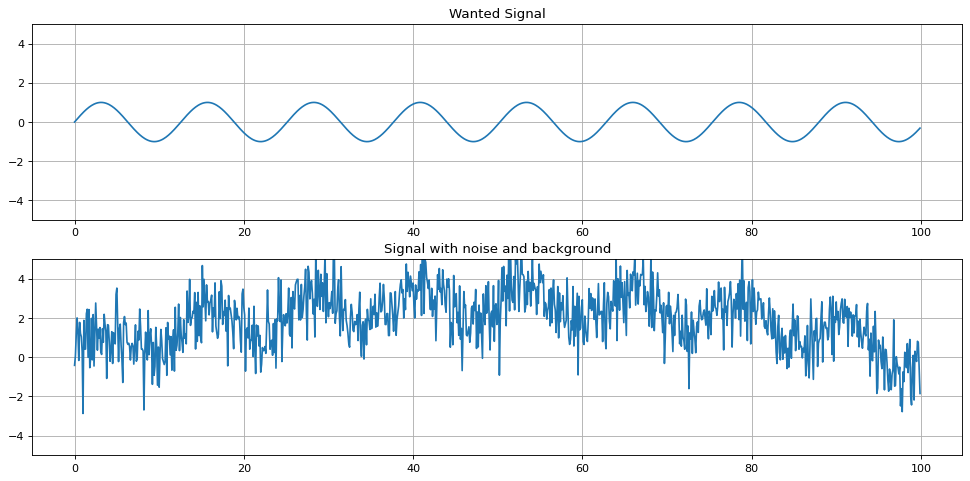

In [9]:
fig = plt.figure(num=None, figsize= (15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(2, 1, 1)
plt.plot(time_vect, signal,)
plt.grid()
plt.ylim(-5,5)
plt.title('Wanted Signal')
plt.subplot(2, 1, 2)
plt.plot(time_vect, noisy_signal)
plt.title('Signal with noise and background')
plt.grid()
plt.ylim(-5,5)
plt.show()




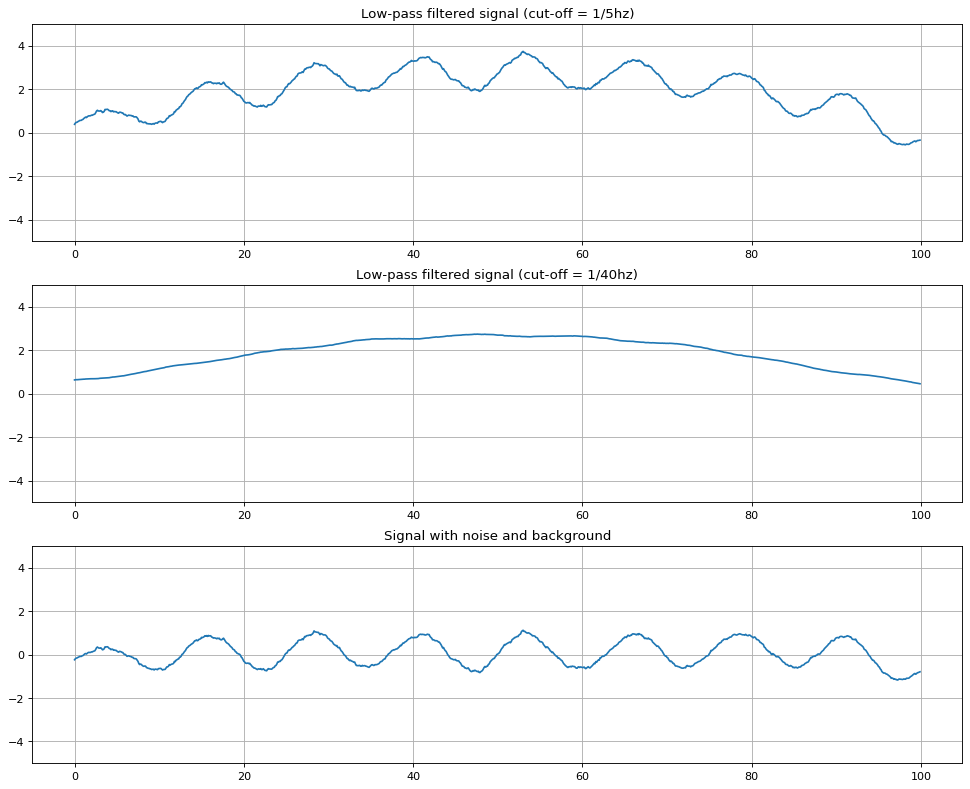

In [13]:
# Method 1: Rolling mean
#First define how long is the window in the running mean

T1 = 5
w1 = int(T1/dt) #Number of data points in the window for low-pass filtering
T2 = 40
w2 = int(T2/dt) #Number of data points in the window for low-pass filtering

#Calculate the running means (filtered signals)
mean_signal = np.convolve(noisy_signal, np.ones(w1)/w1, mode='same') #Averaging over the period of window 1
mean_signal2 = np.convolve(noisy_signal, np.ones(w2)/w2, mode='same') #Averaging over the period of window 2
final_signal = mean_signal - mean_signal2  

fig = plt.figure(num=None, figsize= (15, 12), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(3, 1, 1)
plt.plot(time_vect,mean_signal,)
plt.grid()
plt.ylim(-5,5)
plt.title('Low-pass filtered signal (cut-off = 1/5hz)')
plt.subplot(3, 1, 2)
plt.plot(time_vect, mean_signal2)
plt.title('Low-pass filtered signal (cut-off = 1/40hz)')
plt.grid()
plt.ylim(-5,5)
plt.subplot(3, 1, 3)
plt.plot(time_vect, final_signal)
plt.title('Signal with noise and background')
plt.grid()
plt.ylim(-5,5)
plt.show()
